In [29]:
# Data Handling
import csv
import pandas as pd

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# System Information
import platform

# Numeric Computation and Array Handling
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler

In [31]:
# Print Python version
print("Python Version:", platform.python_version())

Python Version: 3.11.7


In [33]:
# Specifiy CSV file path
file_path = r'C:\Users\kolgi\OneDrive - Western Governors University\D212\medical_clean.csv'

# Open the CSV file and read it using DictReader
with open(file_path, 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)

# Read the CSV file into a pandas DataFrame then open head
df = pd.read_csv(file_path)

In [35]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [39]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [41]:
# Find missing values
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [43]:
# Find duplicates
# Check for duplicate rows
duplicates = df.duplicated()

# Display duplicate rows
print("Duplicate rows:")
print(df[duplicates])

Duplicate rows:
Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, TimeZone, Job, Children, Age, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, vitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

[0 rows x 50 columns]


In [45]:
# Create a new DataFrame with just 'TotalCharge' and 'Income'
new_df = df[['TotalCharge', 'Income']].copy()

# Display the new DataFrame
print(new_df)

      TotalCharge    Income
0     3726.702860  86575.93
1     4193.190458  46805.99
2     2434.234222  14370.14
3     2127.830423  39741.49
4     2113.073274   1209.56
...           ...       ...
9995  6850.942000  45967.61
9996  7741.690000  14983.02
9997  8276.481000  65917.81
9998  7644.483000  29702.32
9999  7887.553000  62682.63

[10000 rows x 2 columns]


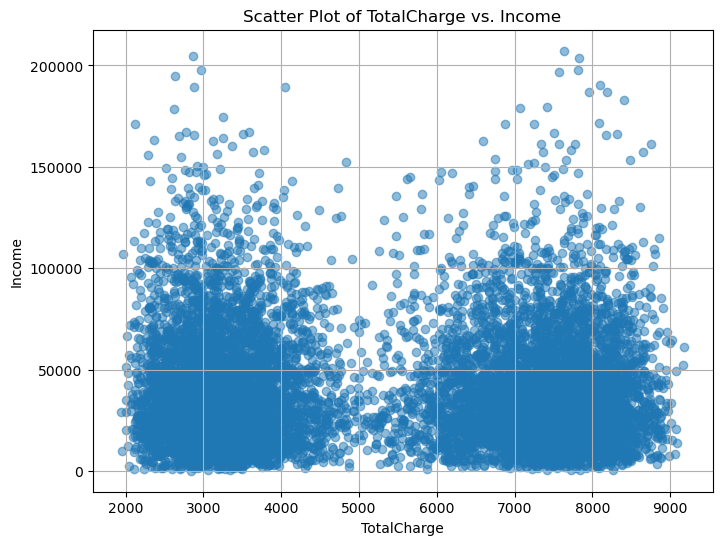

In [47]:
# Plotting TotalCharge vs. Income
plt.figure(figsize=(8, 6))
plt.scatter(new_df['TotalCharge'], new_df['Income'], alpha=0.5)
plt.title('Scatter Plot of TotalCharge vs. Income')
plt.xlabel('TotalCharge')
plt.ylabel('Income')
plt.grid(True)
plt.savefig("t1_scatterplot.png")
plt.show()

In [49]:
# Call describe() method for the two variables
description = new_df.describe()

description

,TotalCharge,Income
count,10000.000000,10000.000000
mean,5312.172769,40490.495160
std,2180.393838,28521.153293
min,1938.312067,154.080000
25%,3179.374015,19598.775000
50%,5213.952000,33768.420000
75%,7459.699750,54296.402500
max,9180.728000,207249.100000


In [51]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the variables
scaled_data = scaler.fit_transform(new_df)

# Create a new DataFrame with the scaled variables
scaled_df = pd.DataFrame(scaled_data, columns=['TotalCharge', 'Income'])

# Display the scaled DataFrame
scaled_df

,TotalCharge,Income
0,-0.727185,1.615914
1,-0.513228,0.221443
2,-1.319983,-0.915870
3,-1.460517,-0.026263
4,-1.467285,-1.377325
...,...,...
9995,0.705765,0.192047
9996,1.114312,-0.894380
9997,1.359597,0.891569
9998,1.069727,-0.378271


In [53]:
# Save the filtered DataFrame to a CSV file
scaled_df.to_csv('task1_scaled_df.csv', index=False)

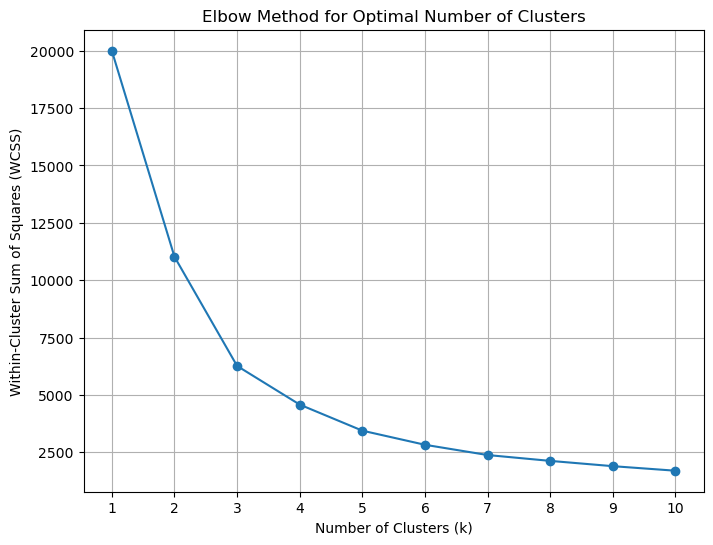

In [55]:
# Calculate within-cluster sum of squares for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=300)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.savefig("t1_elbowmethod.png")
plt.show()

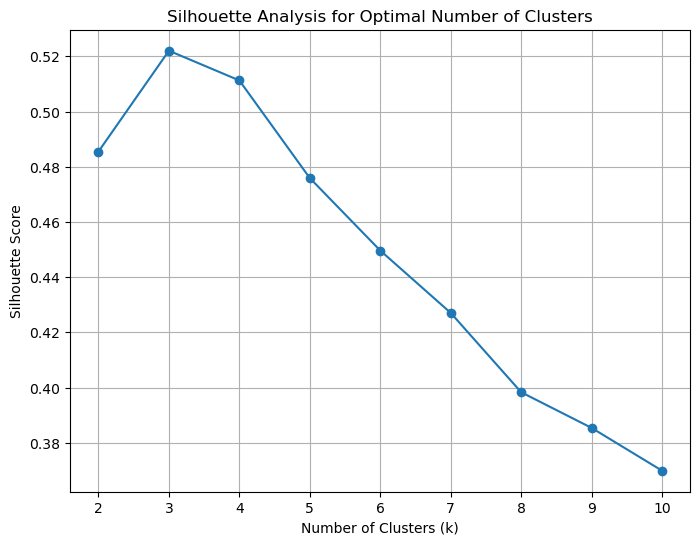

Optimal number of clusters: 3


In [56]:
# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Range of clusters to try
min_clusters = 2
max_clusters = 10

# Compute silhouette score for each value of k
for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k,n_init=25, random_state=300)
    cluster_labels = kmeans.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.grid(True)
plt.savefig("t1_silhouette.png")
plt.show()

# Find the optimal number of clusters with the highest silhouette score
optimal_k = np.argmax(silhouette_scores) + min_clusters
print("Optimal number of clusters:", optimal_k)

In [59]:
# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=25, random_state=300)

# Fit KMeans to the scaled data
kmeans.fit(scaled_df)

KMeans(n_clusters=3, n_init=25, random_state=300)

In [63]:
# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the scaled DataFrame
scaled_df_with_clusters = scaled_df.copy()
scaled_df_with_clusters['Cluster'] = cluster_labels

# Count patients per cluster
cluster_counts = scaled_df_with_clusters['Cluster'].value_counts()

# Display the count of patients per cluster
print(cluster_counts)

Cluster
1    4240
0    4219
2    1541
Name: count, dtype: int64


In [65]:
# Extract centroids with TotalCharge and Income columns
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns=['TotalCharge', 'Income'])

# Display the centroids DataFrame
print(centroid_df)

   TotalCharge    Income
0    -0.948244 -0.336102
1     0.967796 -0.323370
2    -0.068533  1.808531


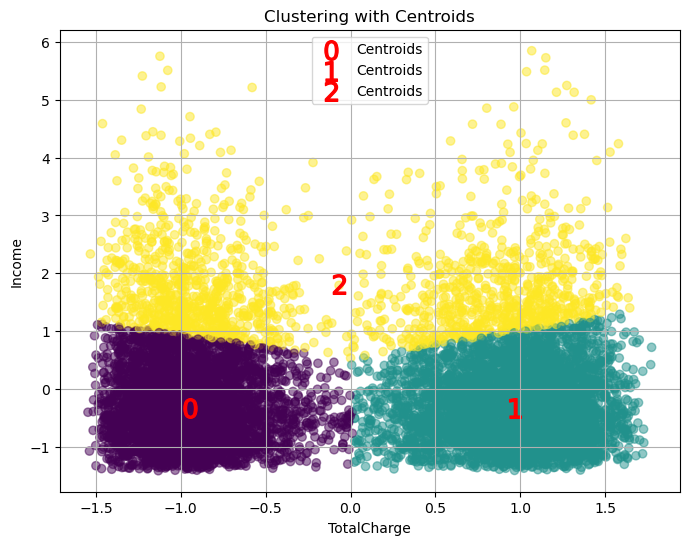

In [67]:
# Extract centroids
centroids = kmeans.cluster_centers_

# Plotting TotalCharge vs. Income with centroids annotated with cluster numbers
plt.figure(figsize=(8, 6))
plt.scatter(scaled_df['TotalCharge'], scaled_df['Income'], c=cluster_labels, cmap='viridis', alpha=0.5)

# Plot centroids and annotate with cluster numbers
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='${}$'.format(i), s=200, c='red', label='Centroids')

plt.title('Clustering with Centroids')
plt.xlabel('TotalCharge')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.savefig("t1_centroids.png")
plt.show()


In [69]:
# Perform one-hot encoding for the 'Gender' variable
df_encoded = pd.get_dummies(df, columns=['Gender']) 

# Convert boolean columns to binary values (0 for 'No', 1 for 'Yes')
df_encoded [['Gender_Female', 'Gender_Male', 'Gender_Nonbinary']] = df_encoded[['Gender_Female', 'Gender_Male', 'Gender_Nonbinary']].astype(int)

# Display the DataFrame with one-hot encoded 'Gender' variable
print(df_encoded.head())


   CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  ...  Item2 Item3 Item4 Item5  Item6  Item7  Item8  \
0  34.34960 -86.72508  ...      3     2     2 

In [71]:
# Add 'Gender' and 'Age' to the DataFrame
scaled_df_with_clusters = scaled_df.copy()
scaled_df_with_clusters['Cluster'] = cluster_labels
scaled_df_with_clusters['Age'] = df['Age']
scaled_df_with_clusters['Gender_Female'] = df_encoded['Gender_Female']
scaled_df_with_clusters['Gender_Male'] = df_encoded['Gender_Male']
scaled_df_with_clusters['Gender_Nonbinary'] = df_encoded['Gender_Nonbinary']

# Display the DataFrame with labeled clusters and additional variables
scaled_df_with_clusters

,TotalCharge,Income,Cluster,Age,Gender_Female,Gender_Male,Gender_Nonbinary
0,-0.727185,1.615914,2,53,0,1,0
1,-0.513228,0.221443,0,51,1,0,0
2,-1.319983,-0.915870,0,53,1,0,0
3,-1.460517,-0.026263,0,78,0,1,0
4,-1.467285,-1.377325,0,22,1,0,0
...,...,...,...,...,...,...,...
9995,0.705765,0.192047,1,25,0,1,0
9996,1.114312,-0.894380,1,87,0,1,0
9997,1.359597,0.891569,1,45,1,0,0
9998,1.069727,-0.378271,1,43,0,1,0


In [73]:
# Calculate value counts of gender
gender_counts = df['Gender'].value_counts()

# Calculate percentage distribution
gender_percentage = (gender_counts / len(df)) * 100

# Create a DataFrame to store the gender counts and percentages
gender_distribution = pd.DataFrame({'Counts': gender_counts, 'Percentage': gender_percentage})

# Display the gender distribution DataFrame
print(gender_distribution)


           Counts  Percentage
Gender                       
Female       5018       50.18
Male         4768       47.68
Nonbinary     214        2.14


In [75]:
# Group by 'Cluster' column and calculate mean and median for specified columns
cluster_stats = scaled_df_with_clusters.groupby('Cluster').agg({'Gender_Female': 'mean',
                                                               'Gender_Male': 'mean',
                                                               'Gender_Nonbinary': 'mean',
                                                               'Age': 'median',
                                                               'Income': 'median',
                                                               'TotalCharge': 'median'}).reset_index()

# Display the DataFrame with cluster statistics
cluster_stats

,Cluster,Gender_Female,Gender_Male,Gender_Nonbinary,Age,Income,TotalCharge
0,0,0.509836,0.469780,0.020384,54.0,-0.413698,-0.981812
1,1,0.498349,0.479717,0.021934,53.0,-0.396655,1.006446
2,2,0.489293,0.487995,0.022713,53.0,1.565609,-0.378333
